# 2022.03.23.

In [2]:
from mcbj import *
import filter_traces
import plots

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

date = "22_03_23"
sample_rate = 50_000
# home_folder = Path(f"D:/BJ_Data/{date}")
home_folder = Path(f"//DATACENTER/BreakJunction_group/BJ_Data/{date}")

r_serial = 99_900

# I(V) measurements

## Details

**bias waveform**: *custom_IV_mcbj_with_wait.ini*

**IV bias range**: $\pm 1\;\text{V}$

added 500 ms long 100 mV wait in the beginning to account for relaxation

## 25201-34200    rate=3

In [3]:
total_num = 34200-25200
print(total_num)

9000


### Filtering traces that did not break during the hold measurement

In [4]:
did_not_break_pull, did_not_break_push = filter_traces.filter_hold(home_folder,
                                                                   filter_condition=filter_traces.does_not_break_array,
                                                                   start_trace=25201, end_trace=34200,
                                                                   bias_offset=0, r_serial_ohm=99900,
                                                                   min_step_len=20_000)

with open(home_folder.joinpath('results/did_not_break_pull.npy'), 'wb') as f:
    np.save(f, did_not_break_pull)
    
with open(home_folder.joinpath('results/did_not_break_push.npy'), 'wb') as f:
    np.save(f, did_not_break_push)

  0%|          | 0/9000 [00:00<?, ?it/s]

In [5]:
with open(home_folder.joinpath('results/did_not_break_pull.npy'), 'rb') as f:
    did_not_break_pull = np.load(f)
    
with open(home_folder.joinpath('results/did_not_break_push.npy'), 'rb') as f:
    did_not_break_push = np.load(f)

In [6]:
print(f'pull: {len(did_not_break_pull)}, {len(did_not_break_pull)/total_num*100}%')
print(f'push: {len(did_not_break_push)}, {len(did_not_break_push)/total_num*100}%')

pull: 388, 4.311111111111112%
push: 8574, 95.26666666666667%


0.6943193472802837


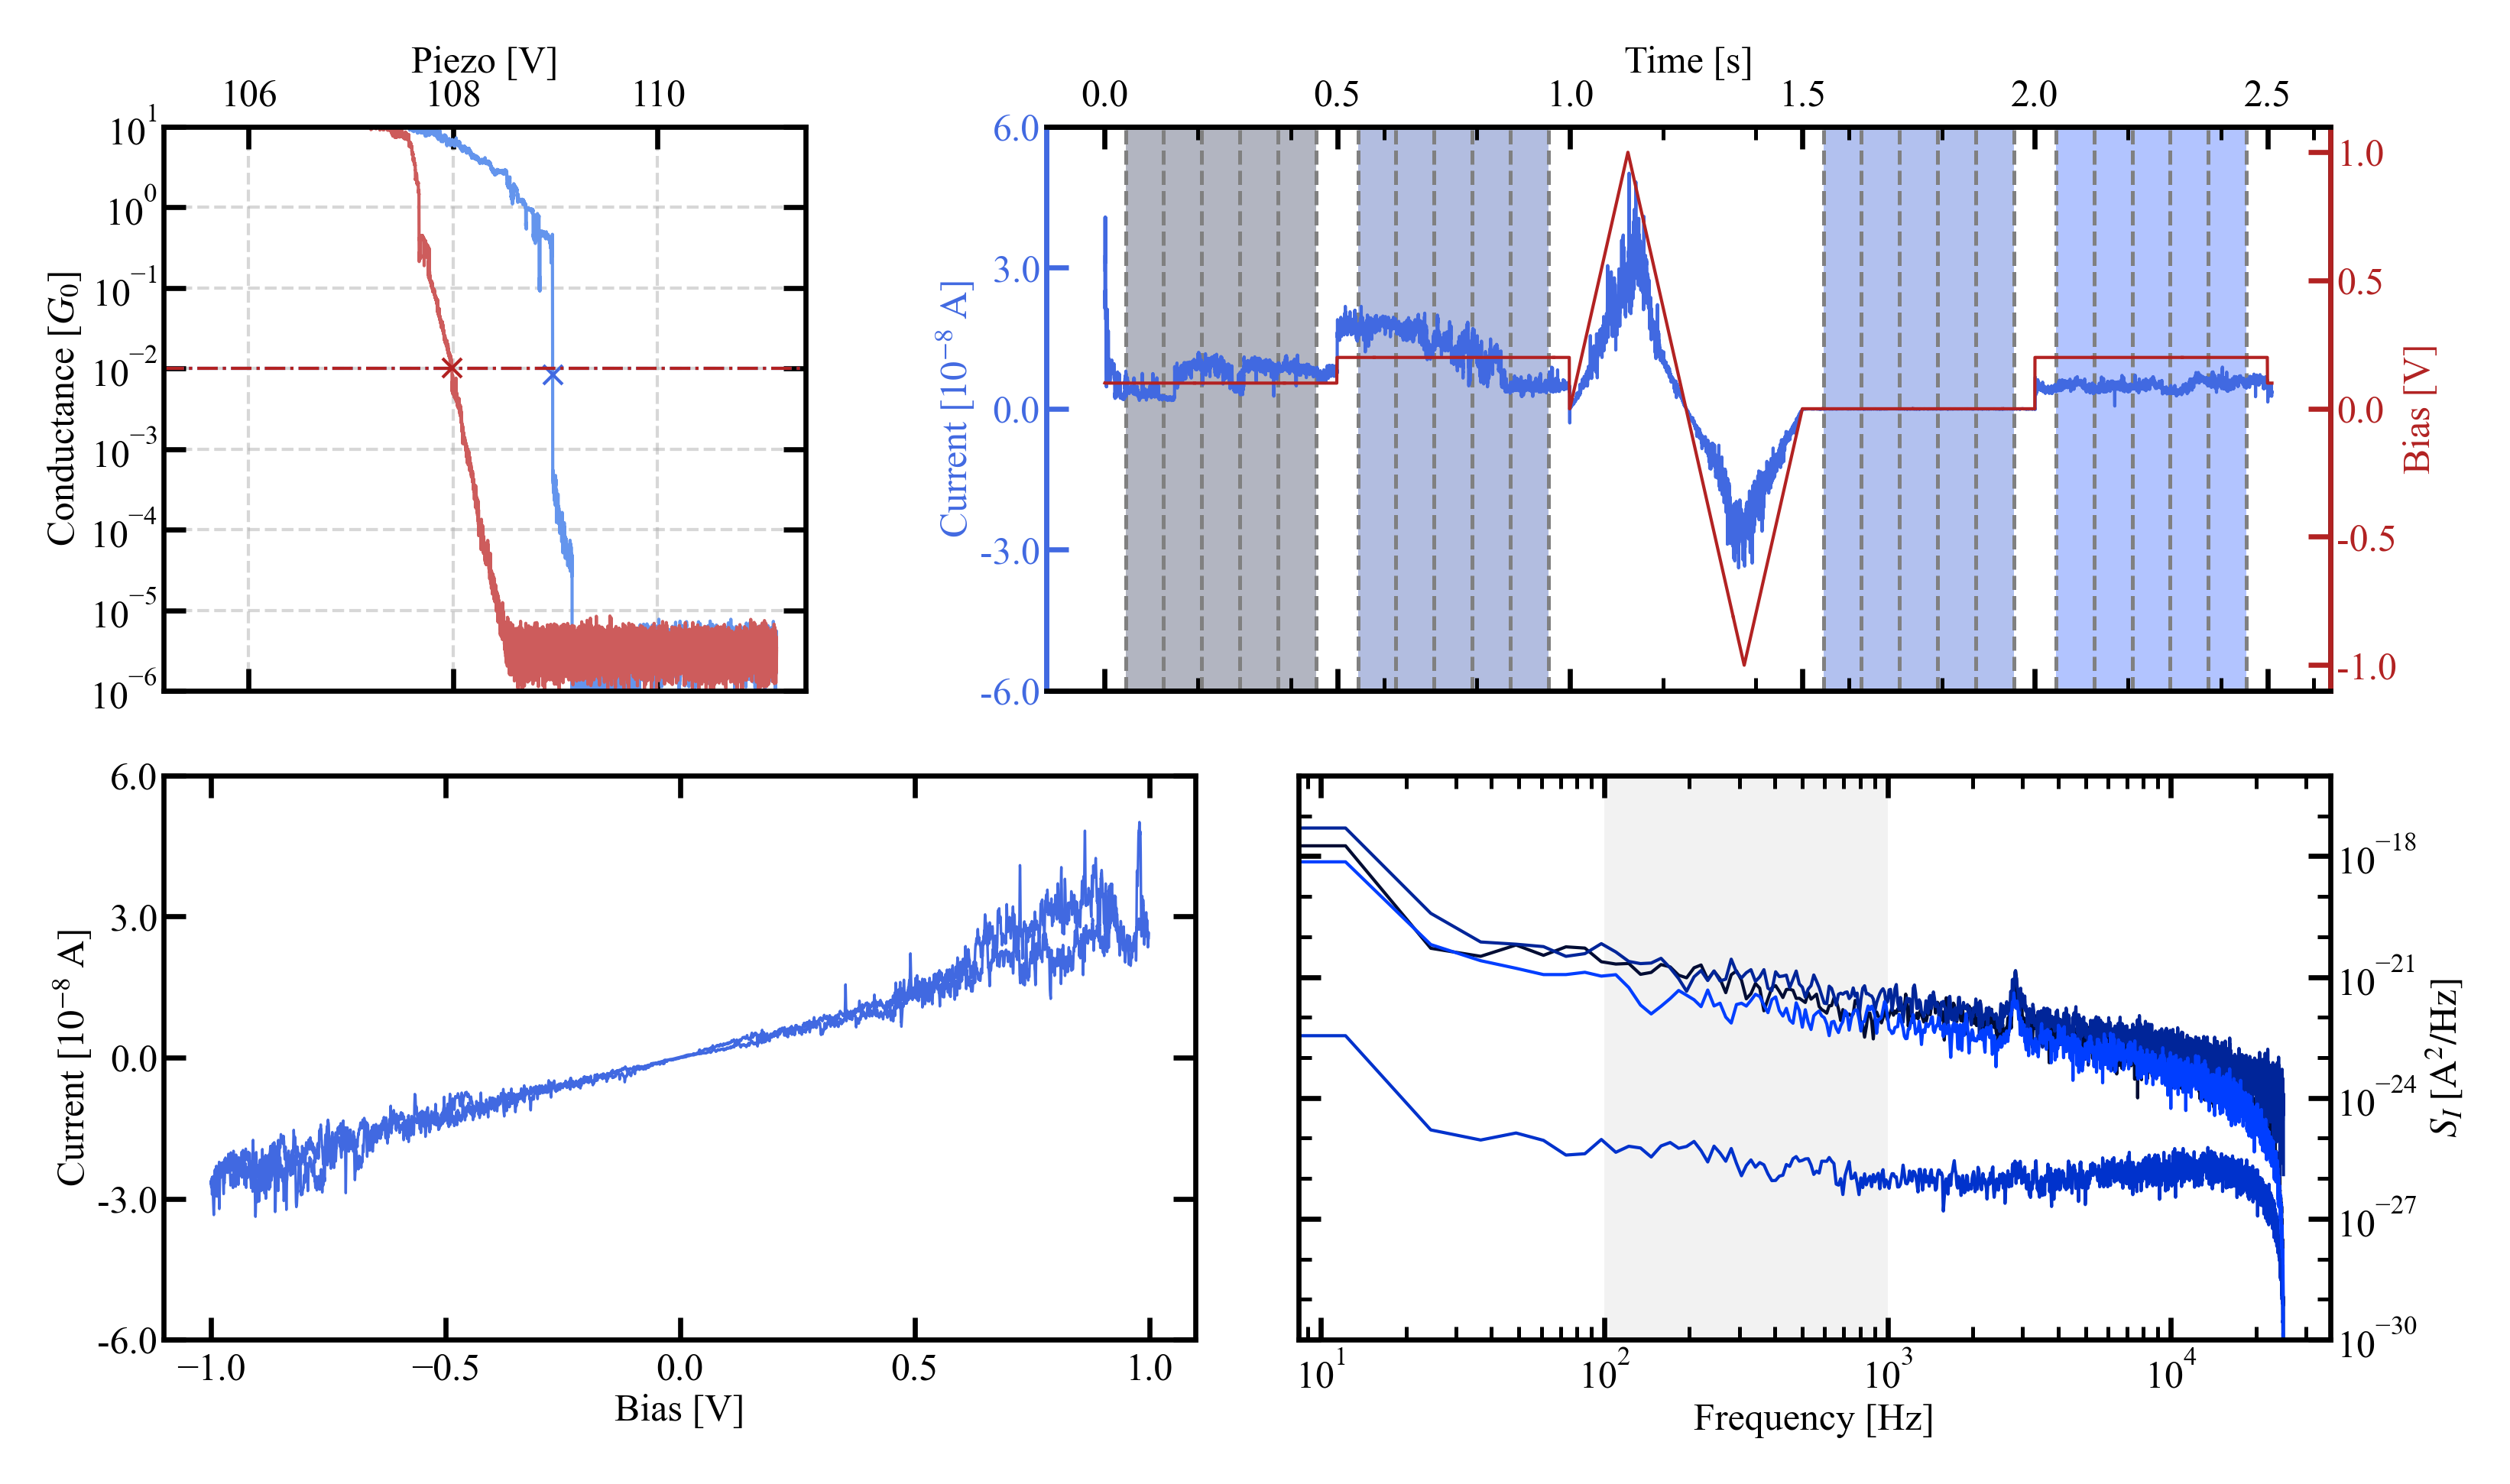

In [15]:
which_trace = did_not_break_pull[6]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=r_serial, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull',
                         smoothing=10, which_psds=[0, 1, 2, 3])

print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

0.596353492240754


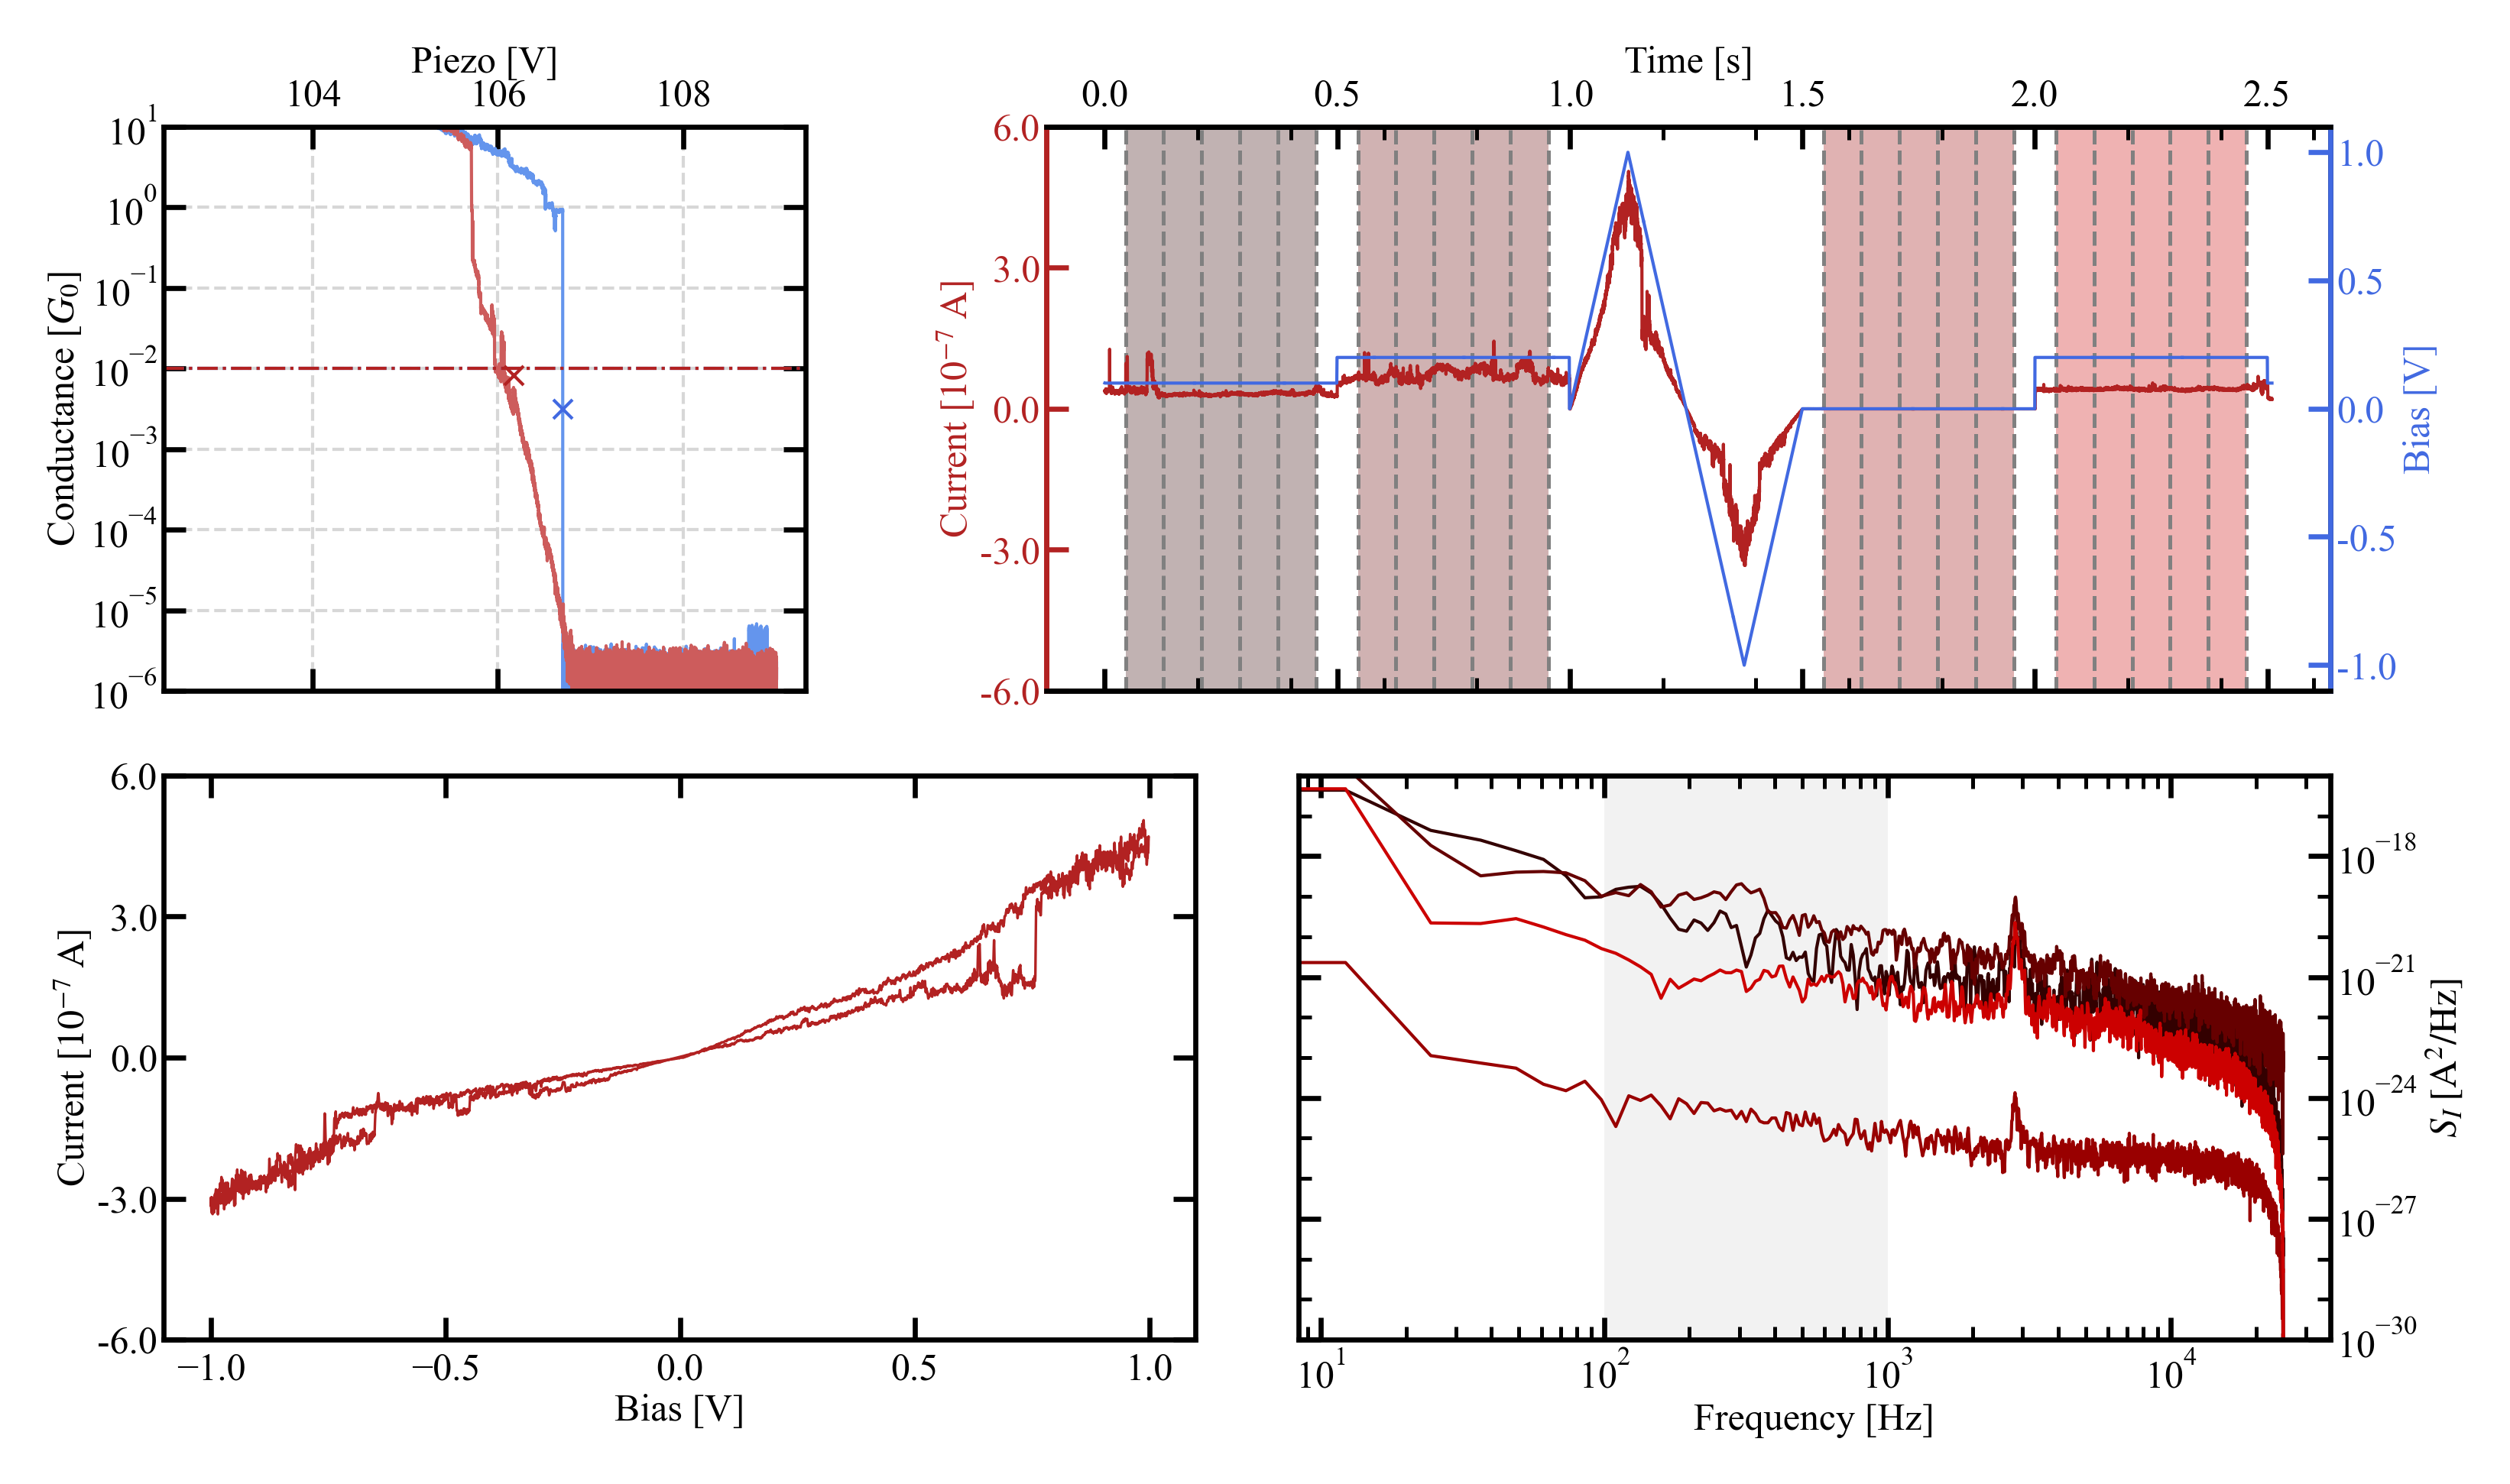

In [18]:
which_trace = did_not_break_push[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=r_serial, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push',
                         smoothing=10, which_psds=[0, 1, 2, 3])

print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))

In [19]:
hold_trace.bias_steps

array([ 0.0990061,  0.1990122, -0.001    ,  0.1990122], dtype=float32)

### Filtering traces where the conductance on the two 200 mV bias plateaus do not differ more than a factor of 2

In [20]:
stable_pull, _ = filter_traces.filter_hold(home_folder, filter_condition=filter_traces.conductances_close,
                                           traces=did_not_break_pull,
                                           bias_offset=0, r_serial_ohm=r_serial,
                                           min_step_len=20_000, max_ratio=2, plateaus=(1, 3))

_, stable_push = filter_traces.filter_hold(home_folder, filter_condition=filter_traces.conductances_close,
                                           traces=did_not_break_push,
                                           bias_offset=0, r_serial_ohm=r_serial,
                                           min_step_len=20_000, max_ratio=2, plateaus=(1, 3))

with open(home_folder.joinpath('results/stable_pull.npy'), 'wb') as f:
    np.save(f, stable_pull)
    
with open(home_folder.joinpath('results/stable_push.npy'), 'wb') as f:
    np.save(f, stable_push)

  0%|          | 0/388 [00:00<?, ?it/s]

  0%|          | 0/8574 [00:00<?, ?it/s]

In [21]:
with open(home_folder.joinpath('results/stable_pull.npy'), 'rb') as f:
    stable_pull = np.load(f)
    
with open(home_folder.joinpath('results/stable_push.npy'), 'rb') as f:
    stable_push = np.load(f)

In [22]:
print(f'pull: {len(stable_pull)}, {len(stable_pull)/total_num*100}%')
print(f'push: {len(stable_push)}, {len(stable_push)/total_num*100}%')

pull: 291, 3.2333333333333334%
push: 8361, 92.9%


We are interested in the I(V) curves where the up-down sweeps overlap nicely. The difference between the up-down sweeps is calculated with the function `filter_traces.iv_difference`

### Filtering traces where the up-down I(V) sweeps overlap

0.6126826799895523


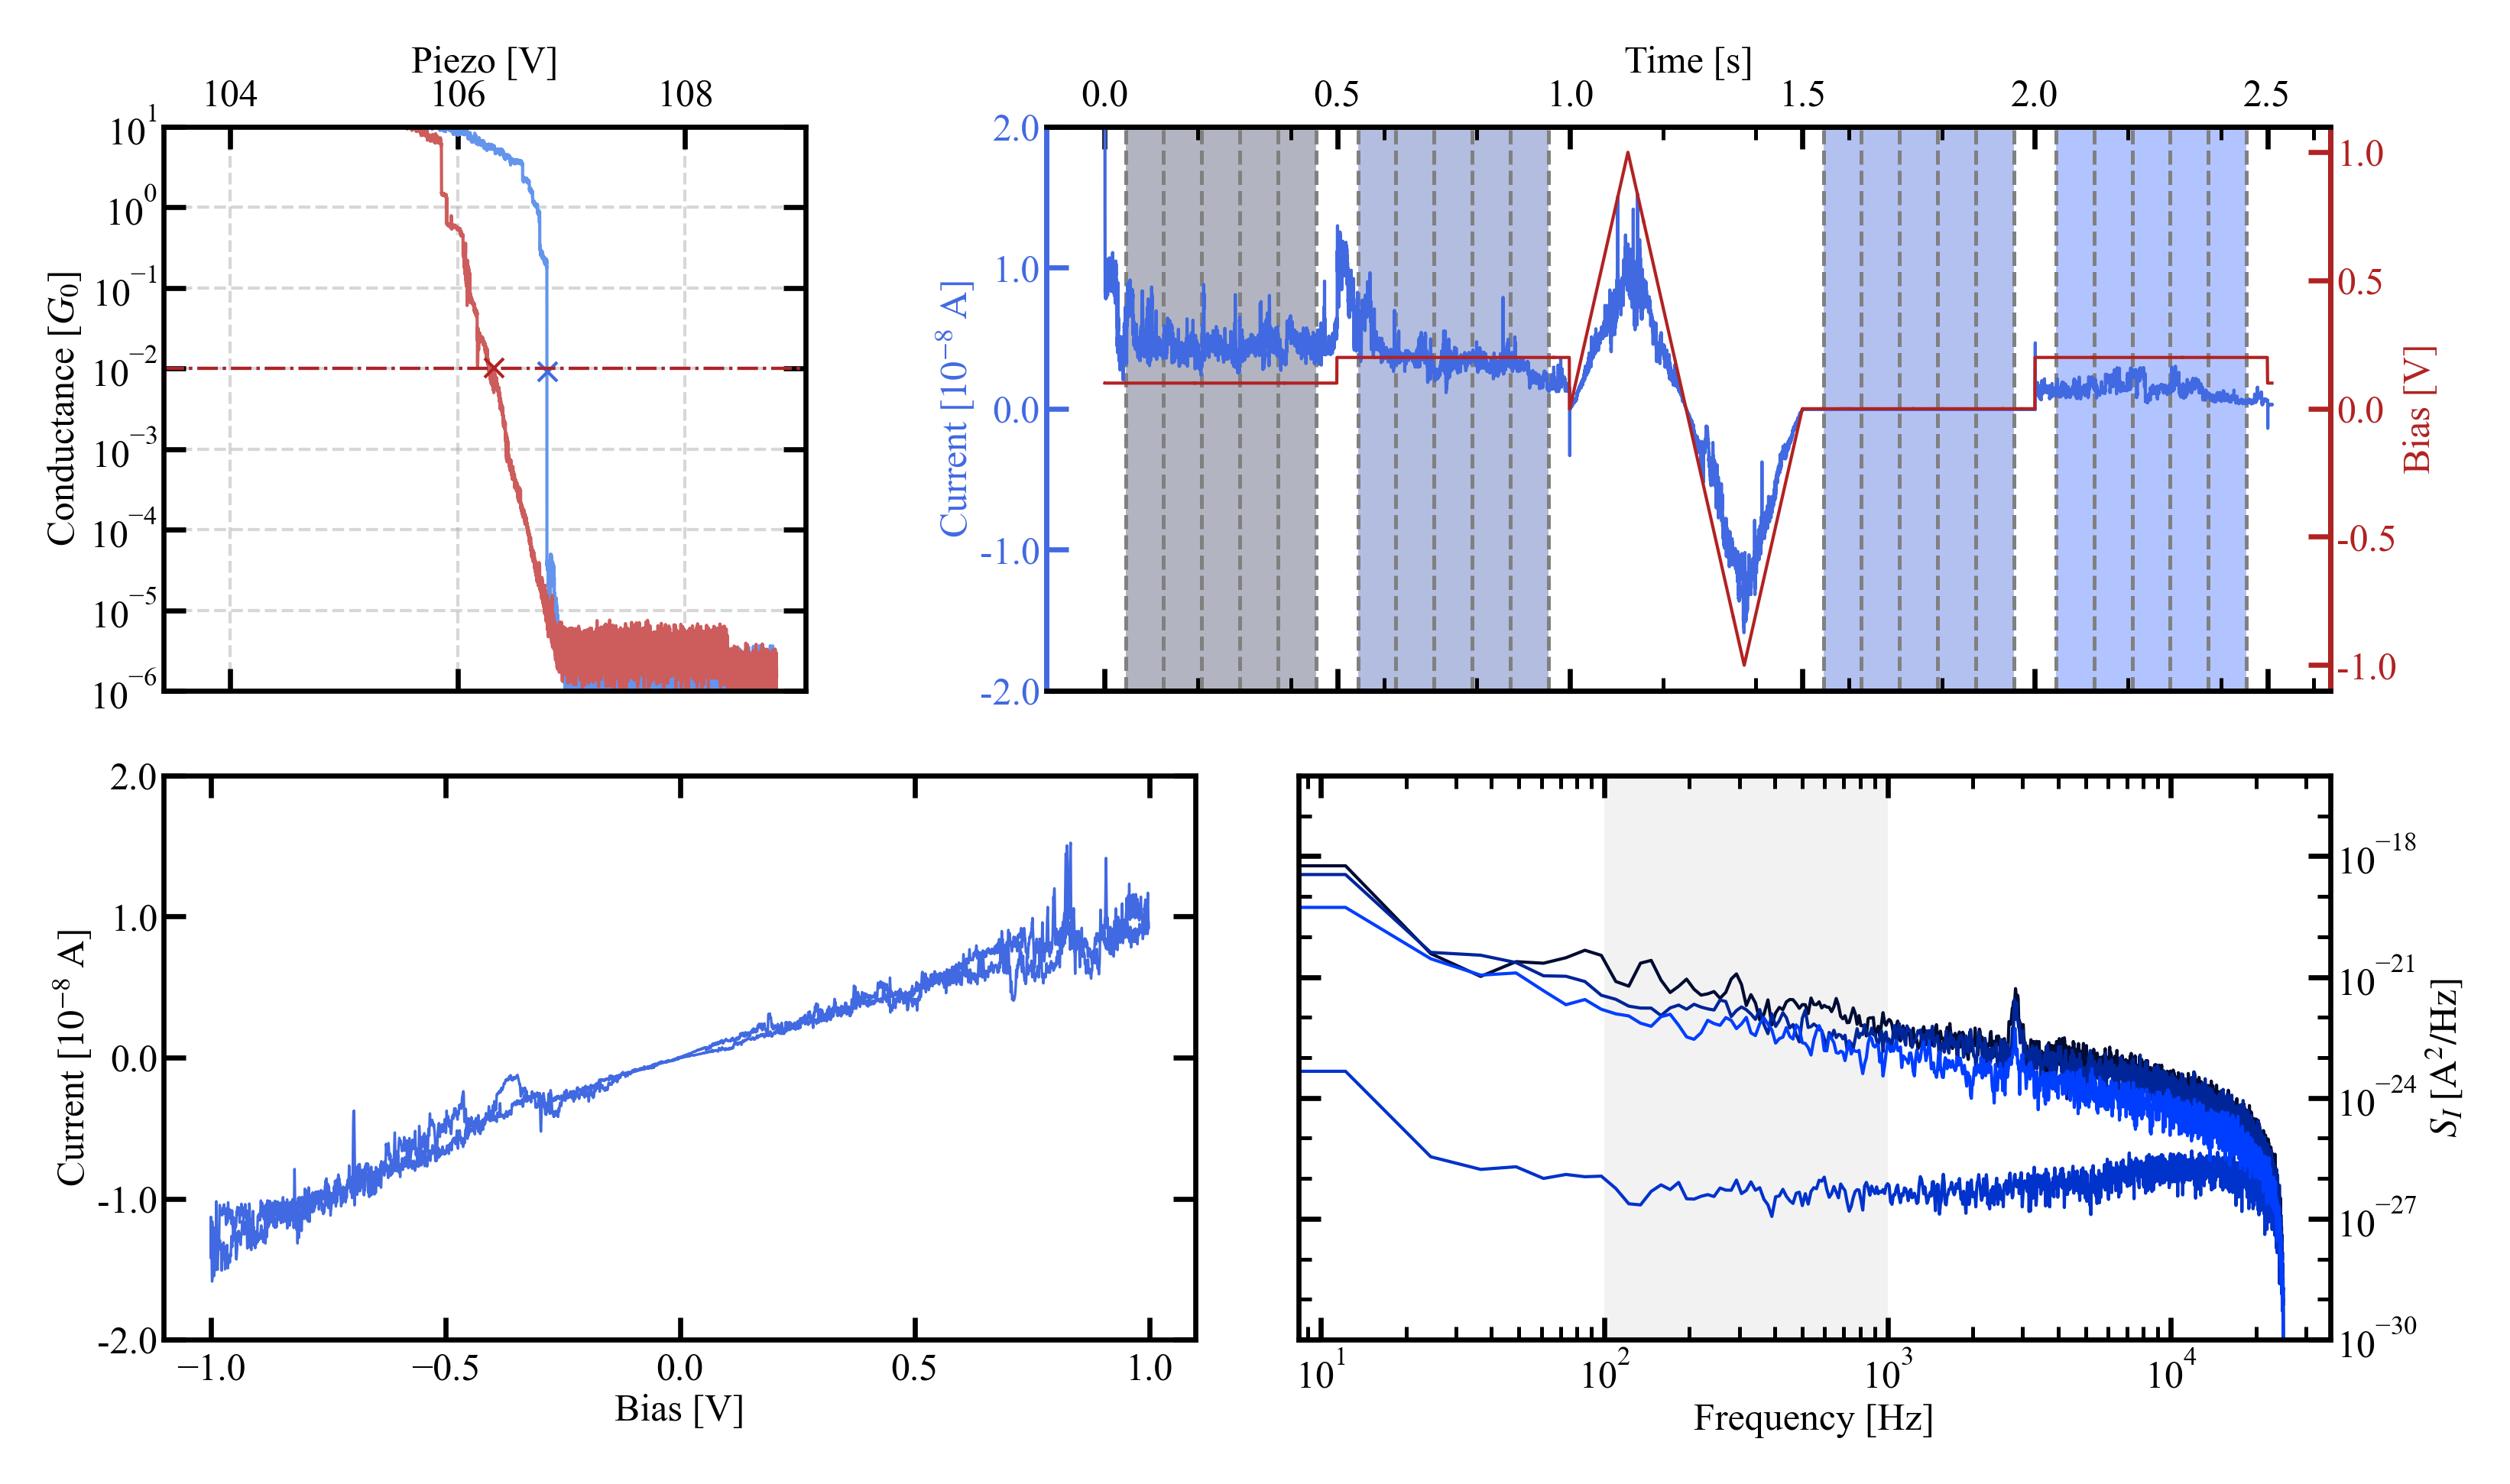

In [29]:
which_trace = stable_pull[1]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=r_serial, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull',
                         smoothing=10, which_psds=[0, 1, 2, 3])

print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

0.596353492240754


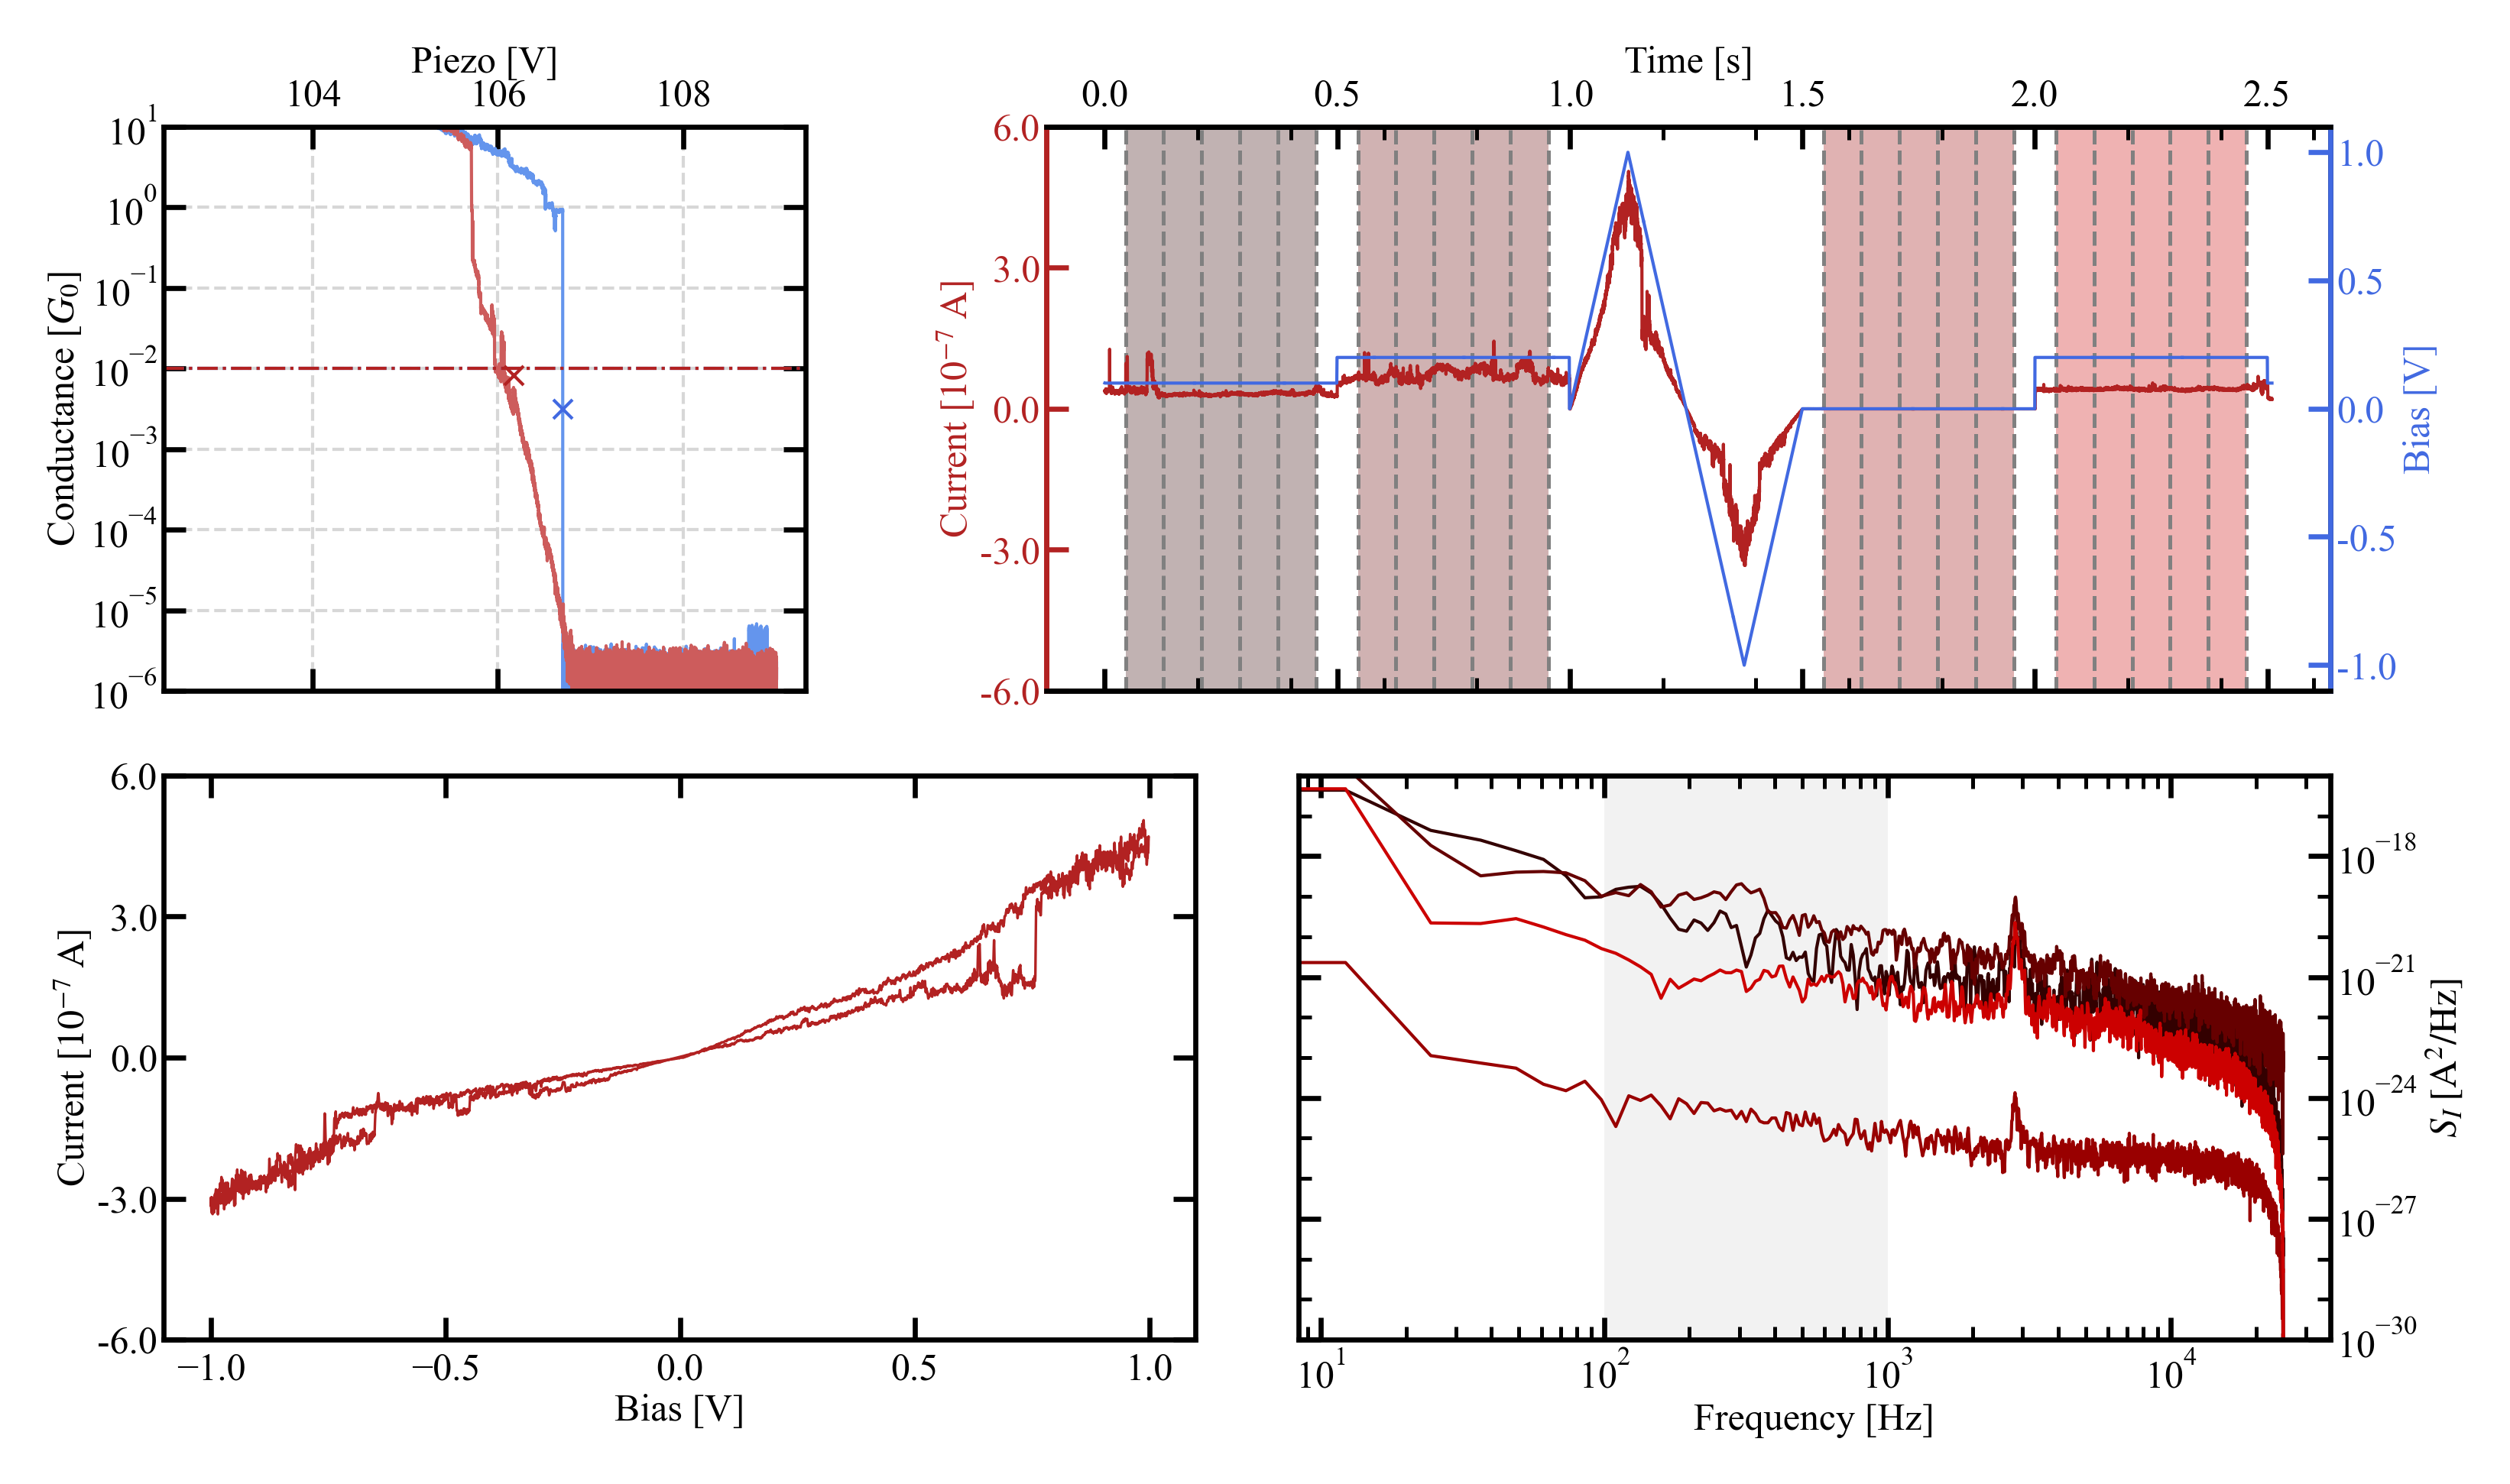

In [28]:
which_trace = stable_push[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=r_serial, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push',
                         smoothing=10, which_psds=[0, 1, 2, 3])

print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))

In [32]:
def get_iv_diff(trace: int, direction: str):
    try:
        hold_trace = HoldTrace(trace, load_from=home_folder, bias_offset=0,
                               r_serial_ohm=99900, min_step_len=20_000, min_height=1, iv=1)
        # push_diff.append(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))
        # traces.append(hold_trace.trace_num)
        return filter_traces.iv_difference(hold_trace, direction=direction, smoothing=100)
    except MeasurementOverflow:
        return -1

In [33]:
push_diff = np.array(list(map(get_iv_diff, stable_push, ['push']*len(stable_push))))

In [34]:
pull_diff = np.array(list(map(get_iv_diff, stable_pull, ['pull']*len(stable_pull))))

1458 17.43810548977395


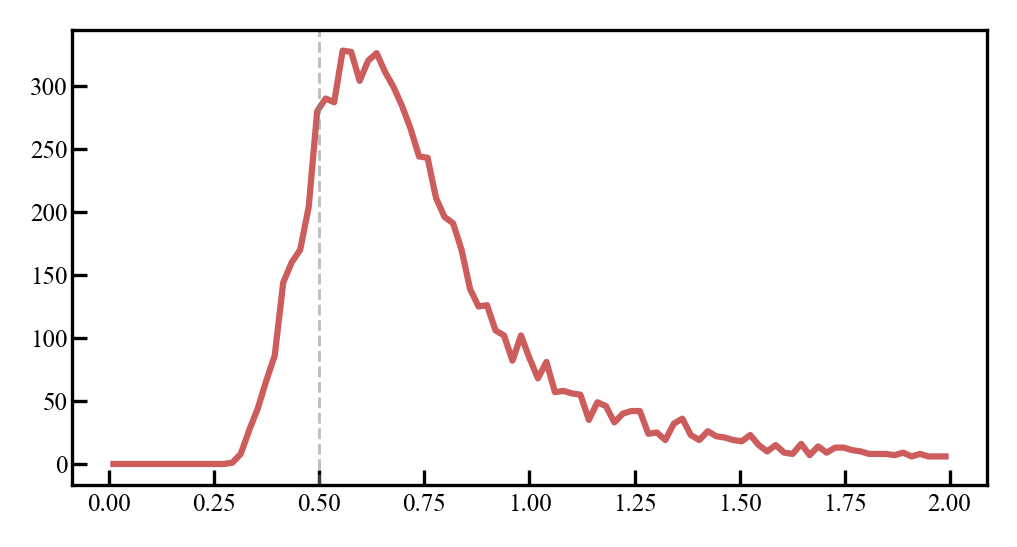

In [35]:
push_diff_bins, push_diff_hist = utils.calc_hist_1d_single(data=push_diff, xrange=(0, 2),
                                                           xbins_num=100, log_scale=False)

print(len(push_diff[push_diff < 0.5]), len(push_diff[push_diff < 0.5])/len(push_diff)*100)

fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 5), dpi=300)
ax.plot(push_diff_bins, push_diff_hist, 'indianred')
ax.axvline(0.5, c='grey', alpha=0.5, ls='--', lw=0.7)

66 22.68041237113402


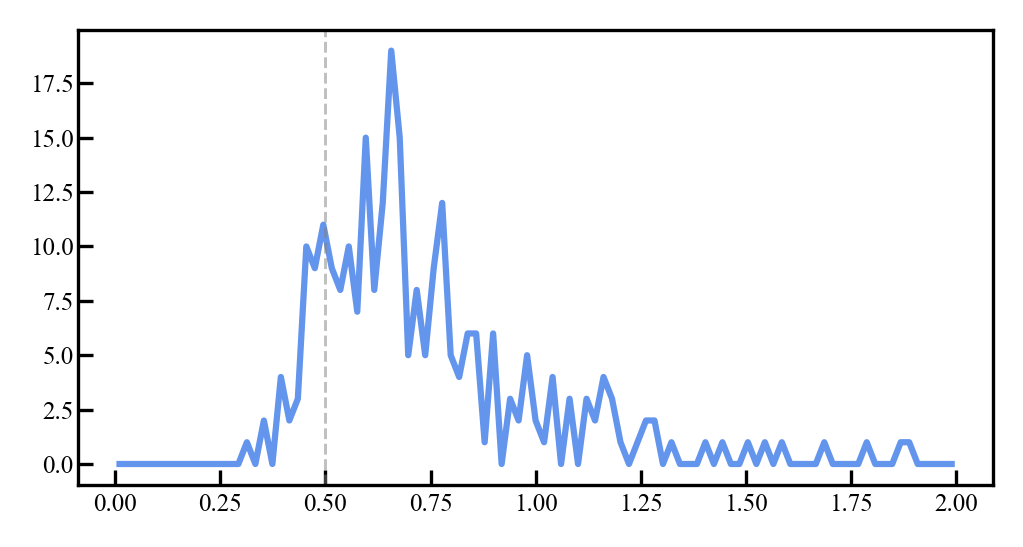

In [36]:
pull_diff_bins, pull_diff_hist = utils.calc_hist_1d_single(data=pull_diff, xrange=(0, 2),
                                                           xbins_num=100, log_scale=False)

print(len(pull_diff[pull_diff < 0.5]), len(pull_diff[pull_diff < 0.5])/len(pull_diff)*100)

fig, ax = plt.subplots(1, figsize=utils.cm2inch(10, 5), dpi=300)
ax.plot(pull_diff_bins, pull_diff_hist, 'cornflowerblue')
ax.axvline(0.5, c='grey', alpha=0.5, ls='--', lw=0.7)

In [37]:
iv_good_push = stable_push[np.where(np.logical_and(push_diff > 0, push_diff < 0.5))[0]]
iv_good_pull = stable_pull[np.where(np.logical_and(pull_diff > 0, pull_diff < 0.5))[0]]

with open(home_folder.joinpath('results/iv_good_pull.npy'), 'wb') as f:
    np.save(f, iv_good_pull)
    
with open(home_folder.joinpath('results/iv_good_push.npy'), 'wb') as f:
    np.save(f, iv_good_push)

In [38]:
with open(home_folder.joinpath('results/iv_good_pull.npy'), 'rb') as f:
    iv_good_pull = np.load(f)
    
with open(home_folder.joinpath('results/iv_good_push.npy'), 'rb') as f:
    iv_good_push = np.load(f)

In [39]:
print(f'pull: {len(iv_good_pull)}, {len(iv_good_pull)/total_num*100}%')
print(f'push: {len(iv_good_push)}, {len(iv_good_push)/total_num*100}%')

pull: 40, 0.4444444444444444%
push: 1124, 12.488888888888889%


In [40]:
iv_good_pull

array([28257, 28261, 28268, 28274, 28275, 28276, 28277, 28282, 28286,
       28505, 28514, 28516, 28517, 29196, 29210, 29211, 29212, 29214,
       29219, 29391, 29454, 29469, 29494, 29527, 29874, 31284, 32159,
       32175, 32224, 32315, 32378, 32450, 32528, 33125, 33128, 33251,
       33362, 33479, 33558, 34150])

0.4438313160717573


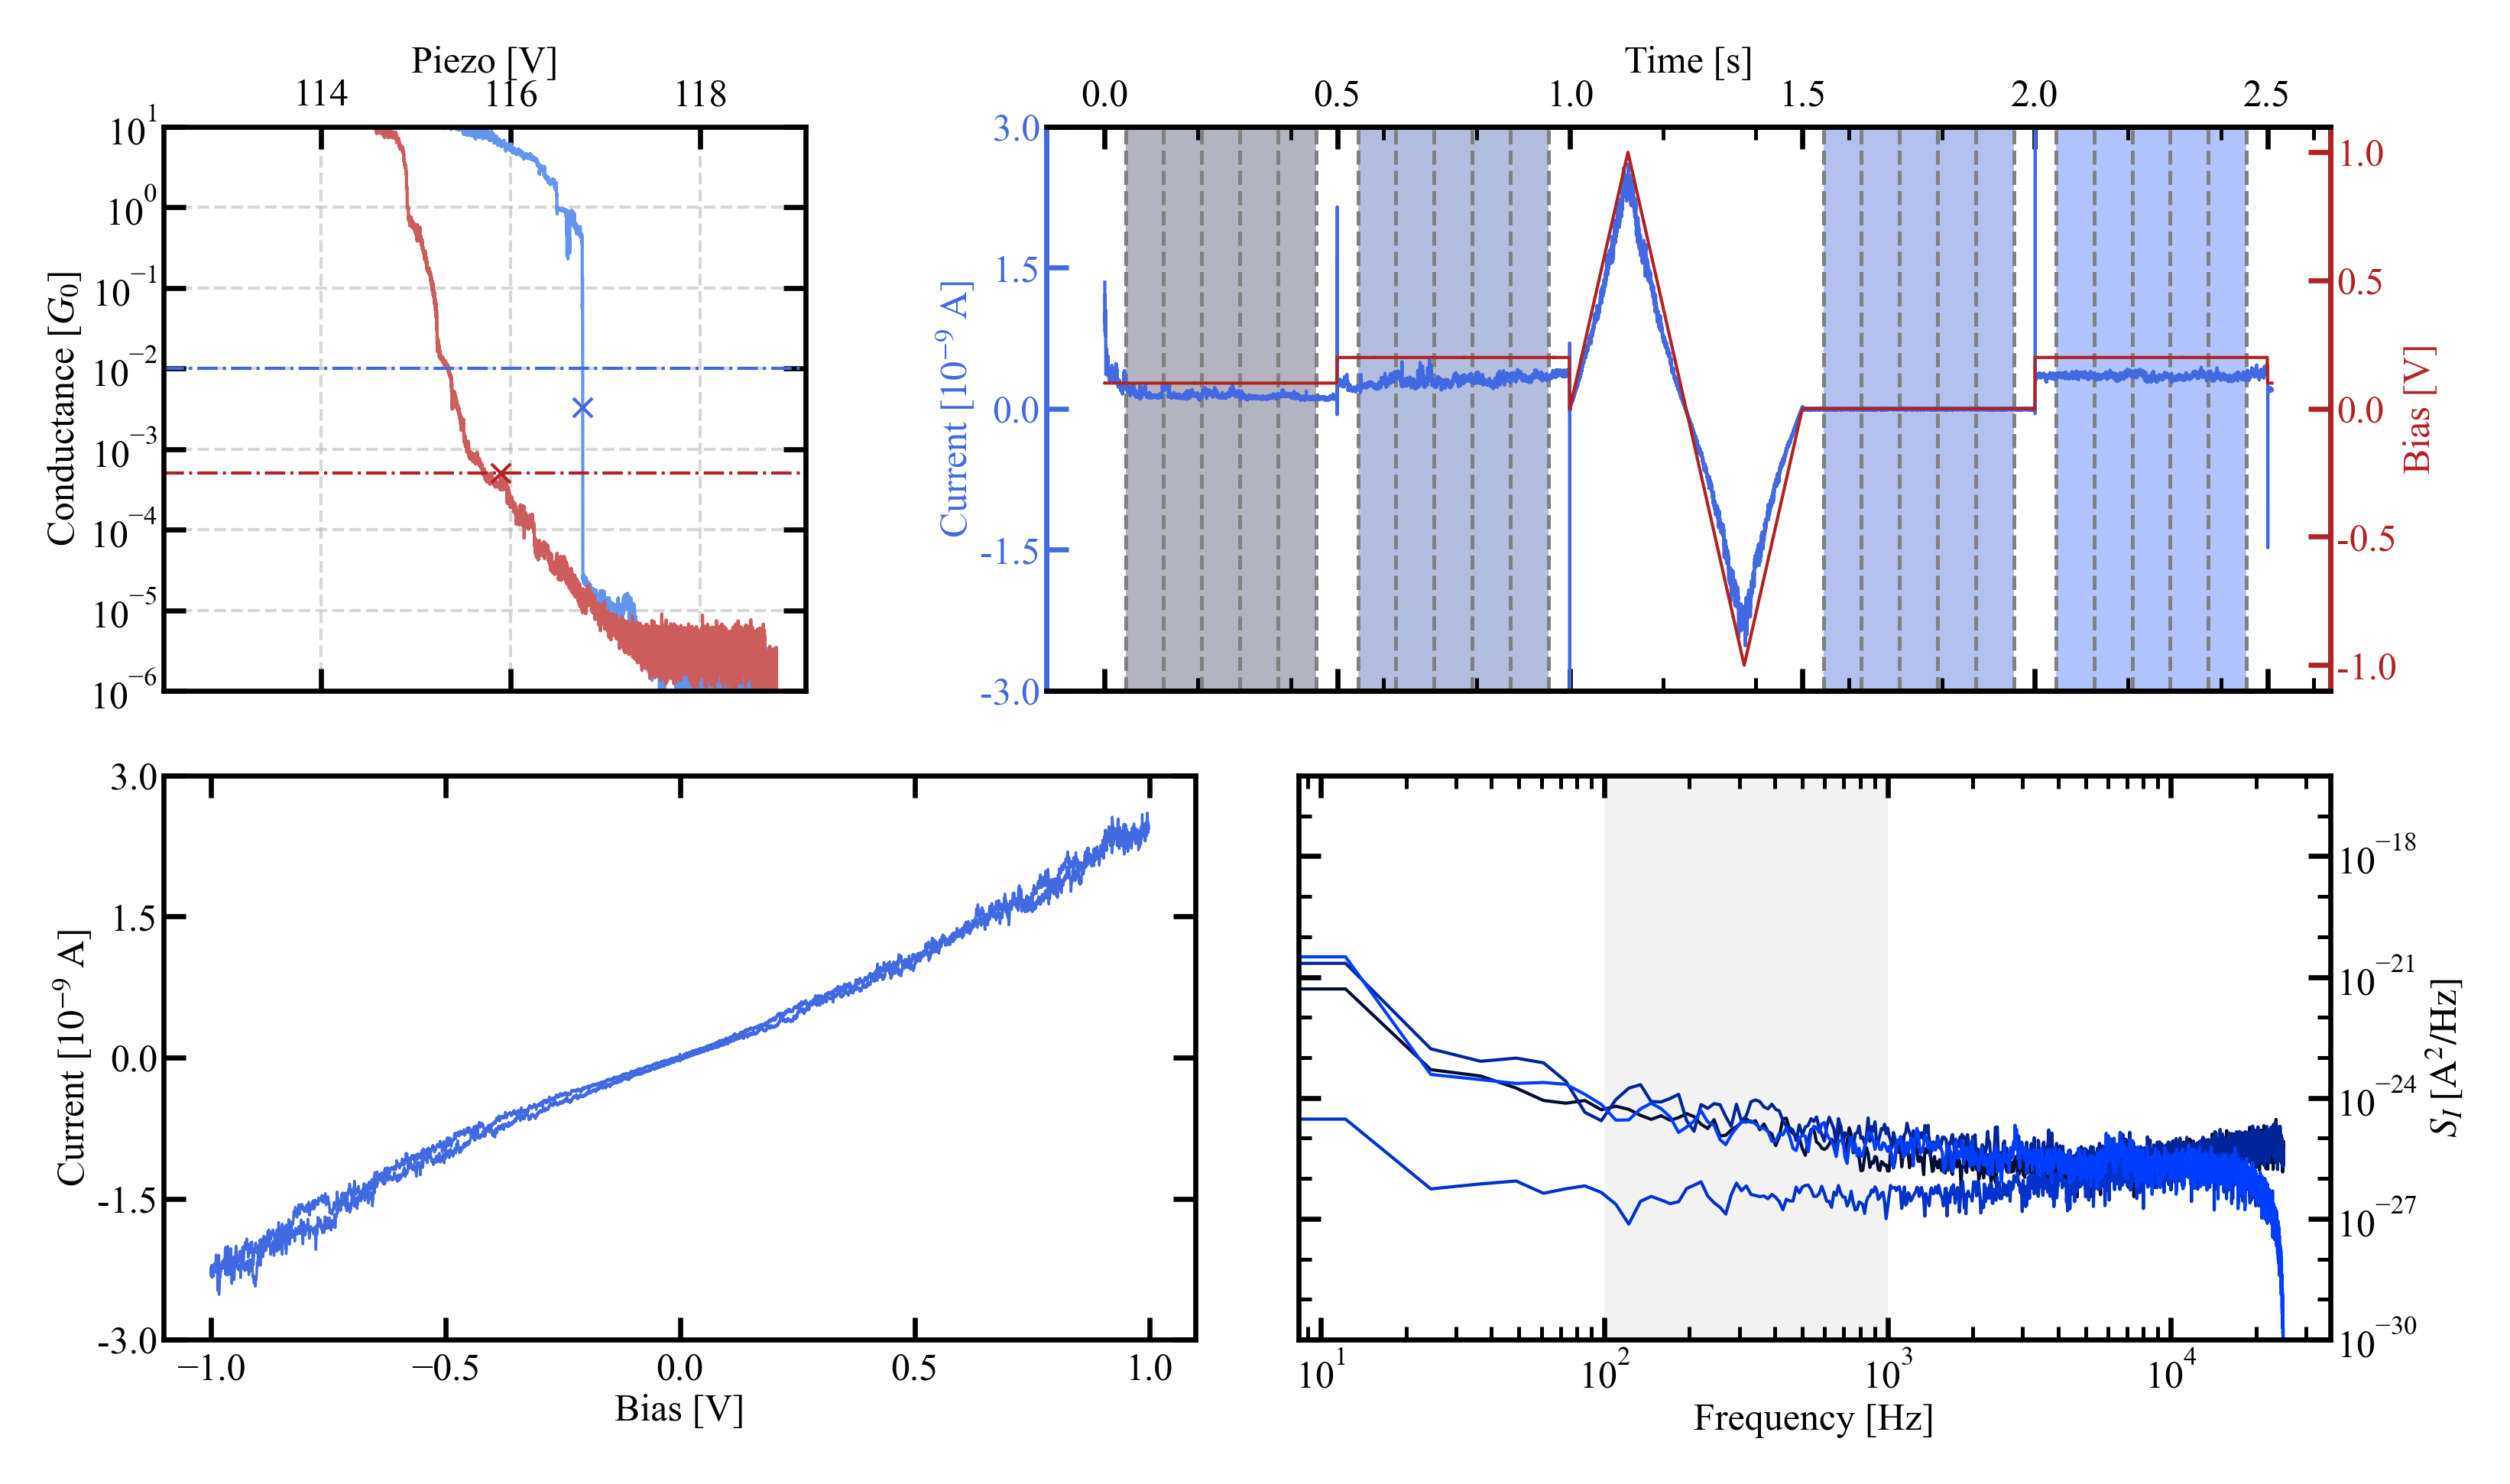

In [43]:
which_trace = iv_good_pull[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=r_serial, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=False)

ax_trace, ax_hold, par_hold, ax_iv, ax_psd = plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='pull',
                                                                       smoothing=10, which_psds=[0, 1, 2, 3])

# ax_iv.set_ylim(-1e-7, 1e-7, 1)
print(filter_traces.iv_difference(hold_trace, direction='pull', smoothing=100))

0.401014615393047


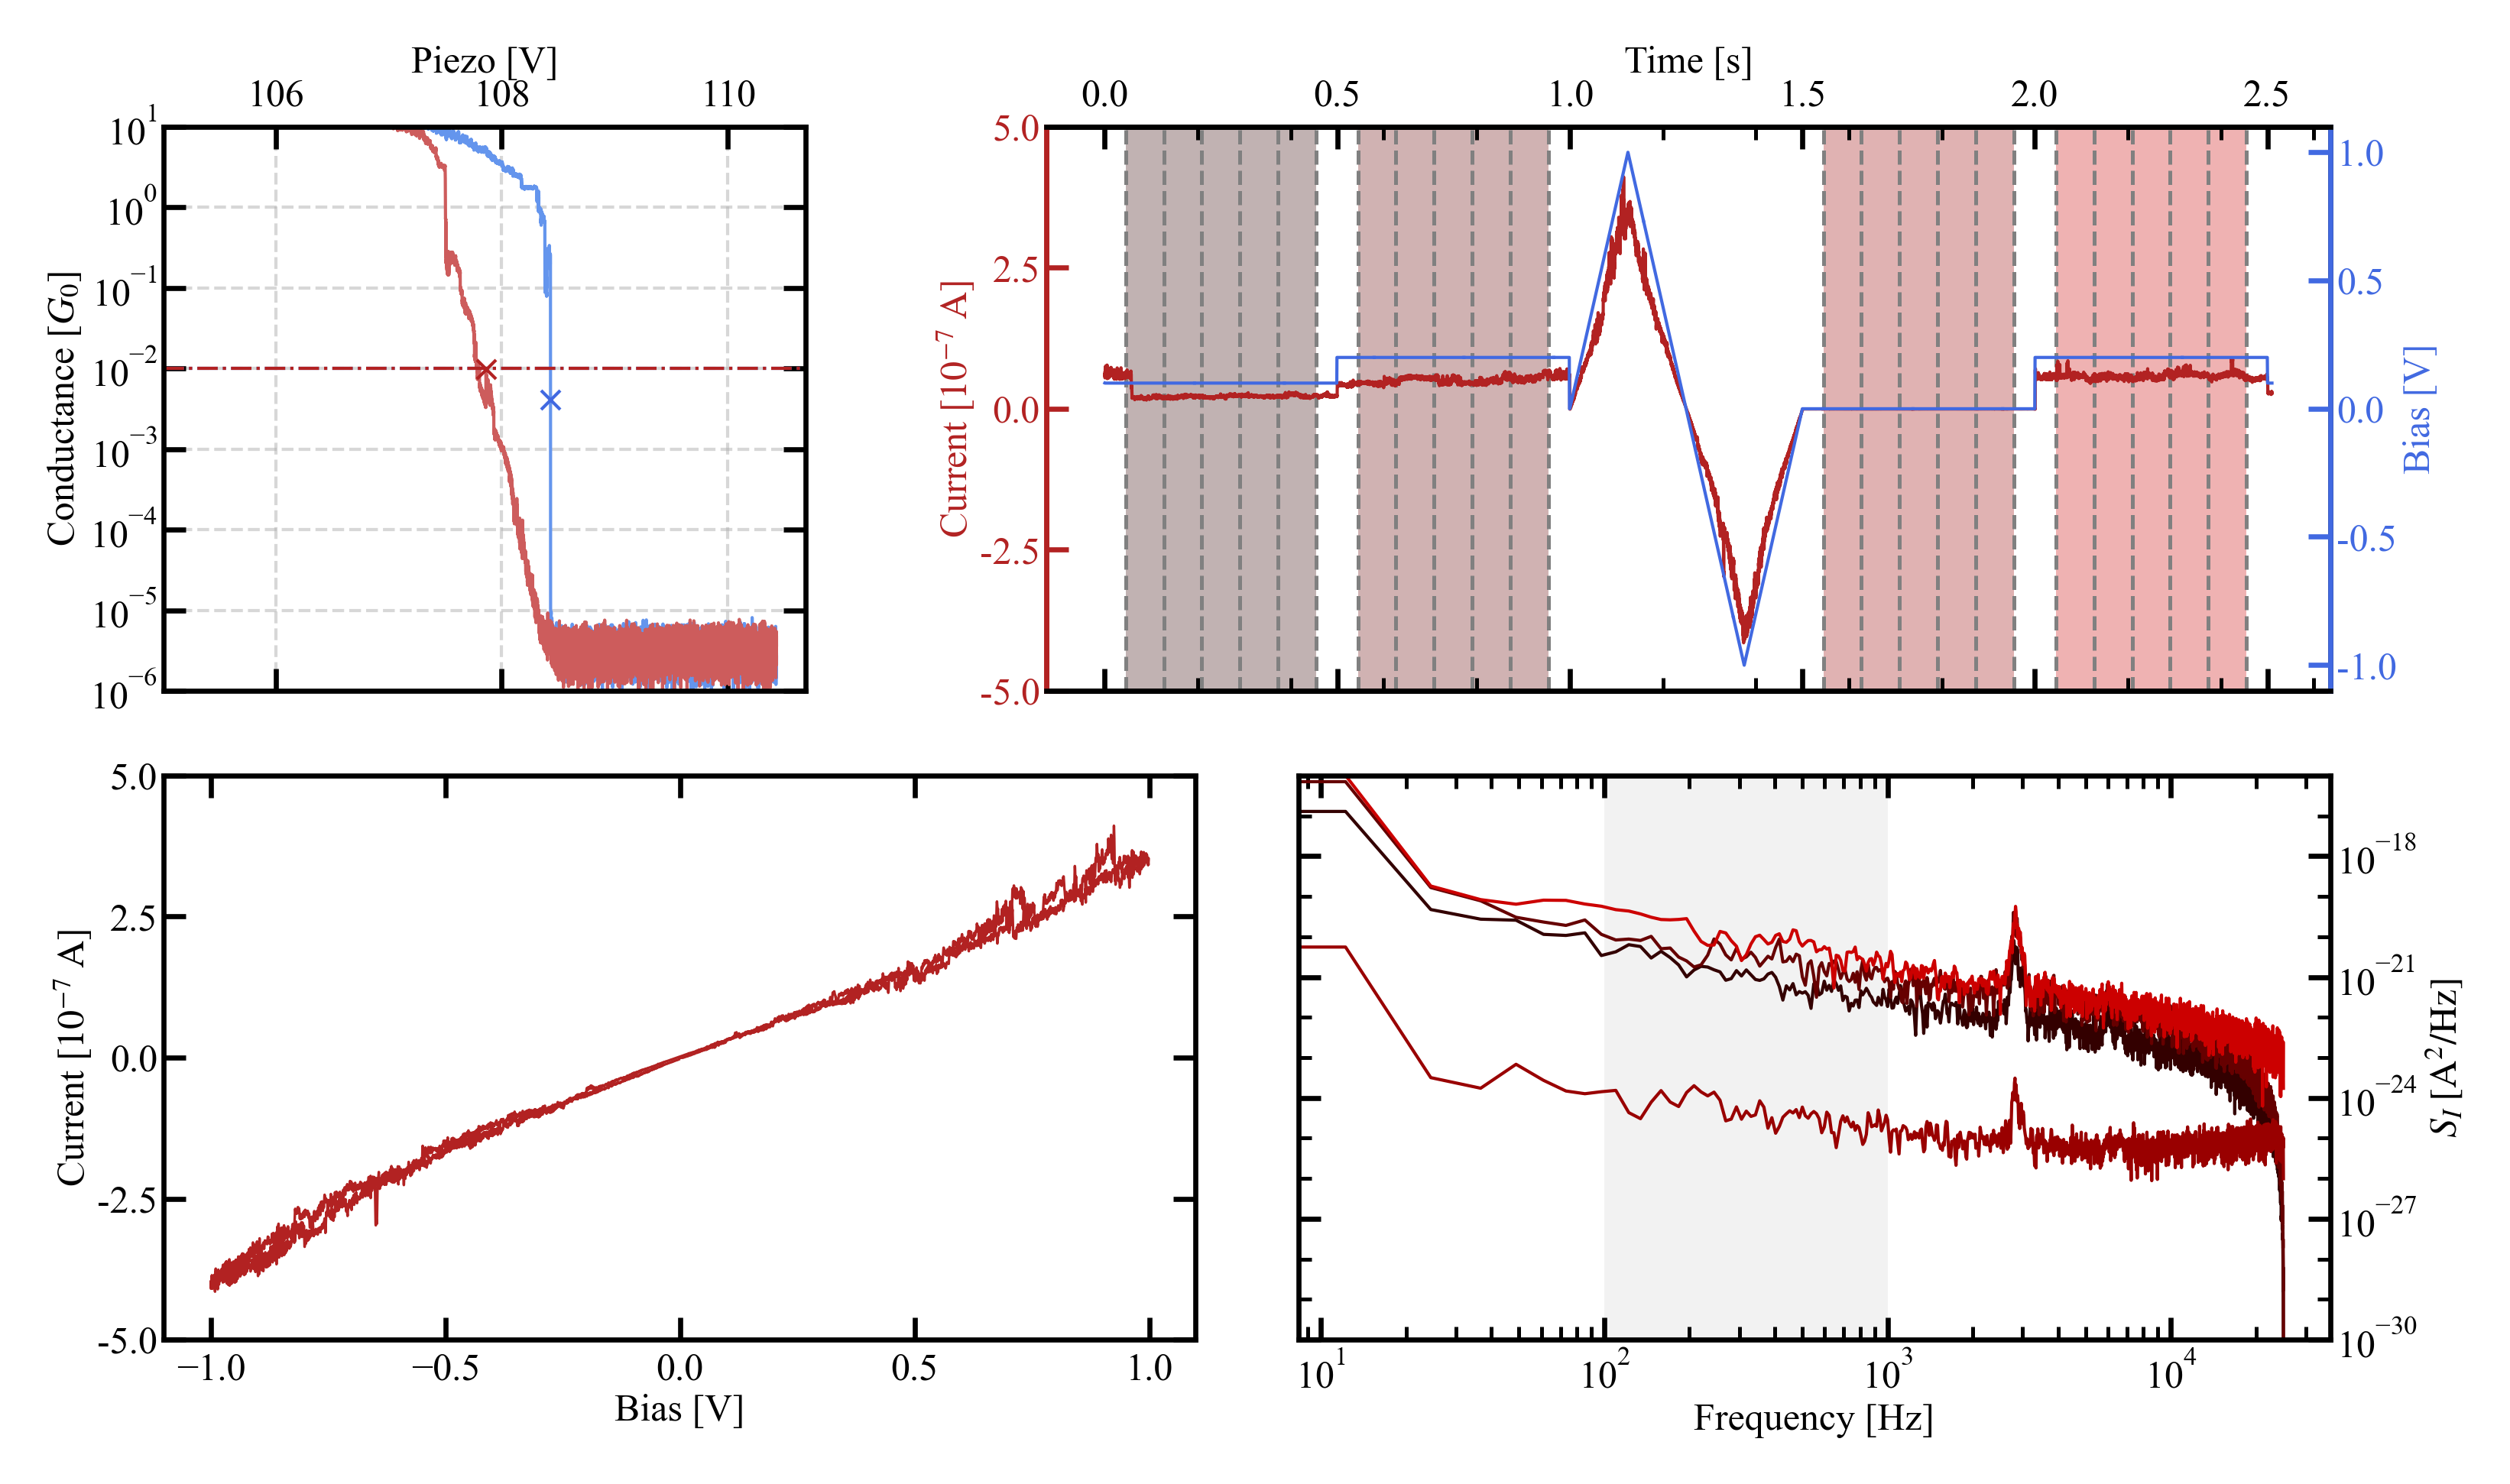

In [44]:
which_trace = iv_good_push[0]

hold_trace = HoldTrace(which_trace,
                       load_from=home_folder, bias_offset=0,
                       r_serial_ohm=r_serial, min_step_len=20_000, min_height=1, iv=1)

trace_pair = TracePair(which_trace, load_from=home_folder)

hold_trace.analyse_hold_trace(num_of_fft=5, subtract_bg=True)

plots.plot_ivs_scheme_one(trace_pair=trace_pair, hold_trace=hold_trace, direction='push',
                          smoothing=10, which_psds=[0, 1, 2, 3])

print(filter_traces.iv_difference(hold_trace, direction='push', smoothing=100))